# Local Group Halo Properties: Demo Inference

In this notebook we show how we are trying to use kinematic measurements of M31 and M33 to constrain a cosmological model of the local group of galaxies, so that we can investigate their dark matter halos.

In [1]:
import localgroup
import triangle, pickle, matplotlib, numpy as np
matplotlib.rc('text', usetex=True)
%matplotlib inline

For this demo, we'll load in some pre-computed objects and use them to illustrate the inference we are trying to do. 

We approximate the local group distance, radial velocity and proper motion likelihood function by sampling from the posterior distributions for these variables reported in the literature, and then transforming to kinematic variables in the M31-centric coordinate system.

In [2]:
L = pickle.load(open("data/Likelihood_demo.p",'rb'))

Inside the Likelihood object is a "triplet" object called T, which contains an array of local groups drawn from the sampling distribution defined by various observations of the Milky Way - M31 - M33 system, such that each sample galaxy triplet has kinematic parameters consistent with the observational data. Let's plot these kinematic parameters in a "triangle" figure, to show all their 1 and 2-D marginal distributions.

Quantiles:
[(0.16, -0.96090546248029451), (0.5, -0.009164124913129585), (0.84, 0.99168224700250363)]
Quantiles:
[(0.16, -1.0064575640703195), (0.5, 0.0094042441906675659), (0.84, 0.98548874202186476)]
Quantiles:
[(0.16, -1.009574470973374), (0.5, -0.10533612839047776), (0.84, 1.0124750916533314)]
Quantiles:
[(0.16, -0.88524603453205053), (0.5, -0.13392925209943959), (0.84, 0.83847739701589374)]
Quantiles:
[(0.16, -1.0193443971989402), (0.5, 0.0041349748380266737), (0.84, 1.0070060105068839)]
Quantiles:
[(0.16, -0.92724195928436681), (0.5, -0.014676880828483327), (0.84, 0.96174537226164825)]


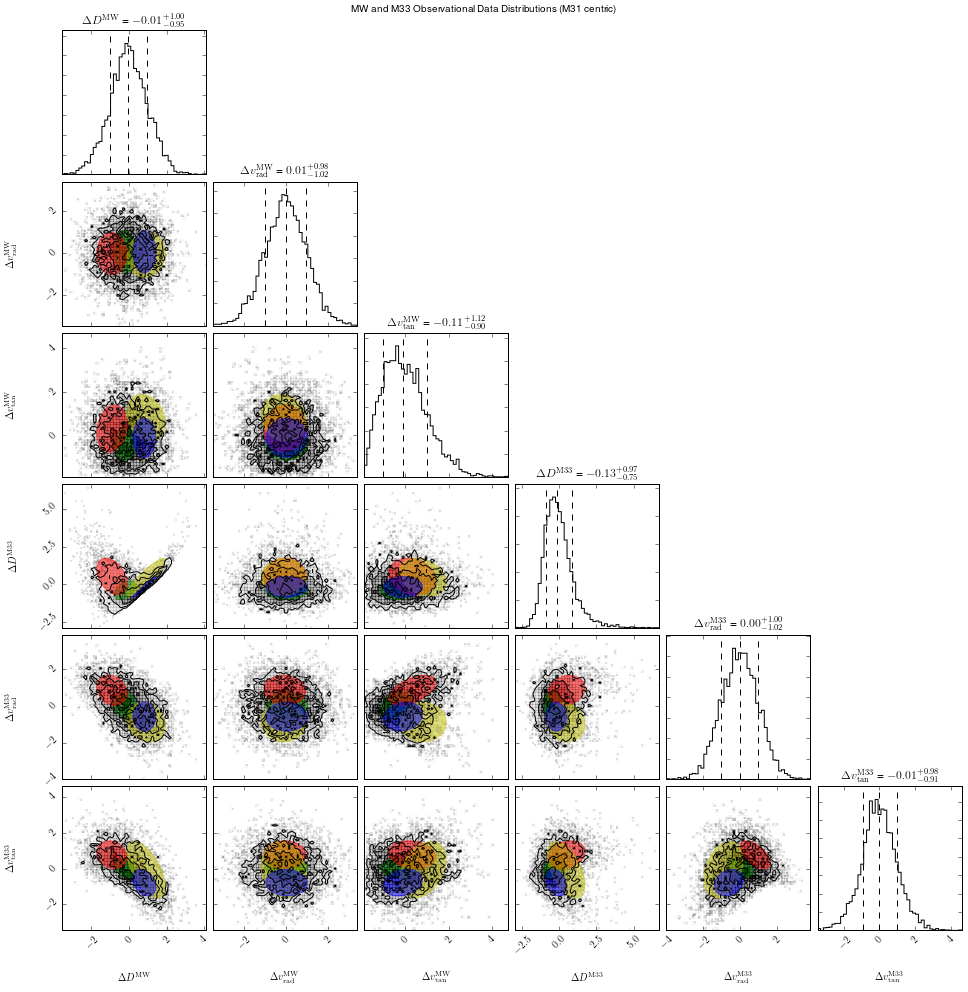

In [3]:
observation_significance = L.plot_samples(4, overlay=True)

The above plot shows the density of sample local groups - the sampling distribution of the "data," which we take to be the distance, and radial and tangential velocities of the Milky Way and M33 relative to M31. The shaded regions show two standard deviations. For this plot, the samples have been mean-offset to zero and scaled by their standard deviation, to make it easier to fit a Gaussian Mixture Model to them - this is shown by the colored ellipses. Since we are using the Gaussian Mixture Model to model the underlying PDF of the data, more components is always better: here we have used 5.

# Evaluating the goodness of fit of our model Likelihood

Due to lack of a standard goodness of fit test for GMM's, the best we can do is graphically show that the model reproduces the data well. We proceed by drawing a set of points from the fitted model, where each point is a local group with (MW_D, MW_vr, MW_vt, M33_D, M33_vr, M33_vt). We then plot the 1D and 2D marginalizations of the drawn point set and show that the marginalizations match the marginalizations of the true data.

Quantiles:
[(0.16, -0.98626205054053973), (0.5, 0.013819790693493747), (0.84, 1.0005363302328212)]
Quantiles:
[(0.16, -0.98400576458876643), (0.5, 0.020571631064155393), (0.84, 0.9520665485349521)]
Quantiles:
[(0.16, -0.97373490992376854), (0.5, -0.055582572639913647), (0.84, 0.99890752281473483)]
Quantiles:
[(0.16, -0.90937466350873641), (0.5, -0.12154112328629002), (0.84, 0.89212667530937262)]
Quantiles:
[(0.16, -0.99728492523132339), (0.5, -0.021519054915494717), (0.84, 1.0046259266240996)]
Quantiles:
[(0.16, -0.96447203979861351), (0.5, -0.01707837567141484), (0.84, 0.88532755852249734)]


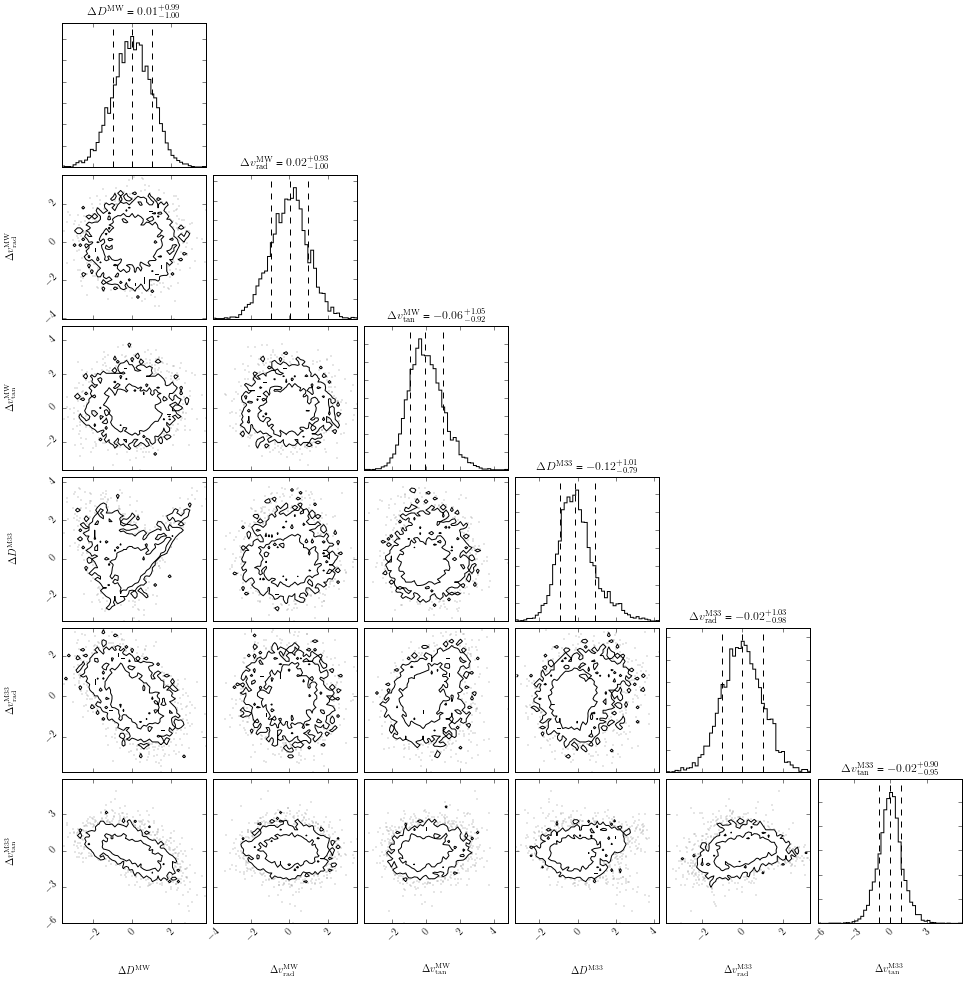

In [5]:
goodness_of_fit = L.model_gof(L.T.Nsamples)

The above plot shows that the points drawn from the model create a population that is very similar to the true data - although it would be better to plot one on top of the other. We are working on making the triangle plots smoother, to enable such an overlay to be made comprehensibly.

# Consuelo Simulation Model Local Groups

We now read in a preconfigured file containing a set of Local Group analogs from the Consuelo simulation packaged into another Triplet object. These simulated systems represent samples drawn from the Lambda CDM prior PDF for groups of dark matter halos. We can plot the marginalized distribution of these systems' kinematic parameters, which will allow us to compare this prior PDF with the actual Local Group likelihood.

In [6]:
Model = pickle.load(open("data/Triplet_demo.p", 'rb'))

The above Triplet object `Model` is loaded from the file Triplet_demo.p.  It contains 5000 triplets from Consuelo stored in the field `Model.sim_samples`.  The halo masses are stored as `Model.{MW, M33, M31}.Mvir`.  The `sim_samples` have been preprocessed by the means and standard deviations of the Likelihood object, so that the likelihood of each one can be accurately evaluated by `L.evaluate(Model.sim_samples)`.  

Quantiles:
[(0.16, -5.6556287079120082), (0.5, 1.6888664563988325), (0.84, 7.5853782777748453)]
Quantiles:
[(0.16, -9.4176521604492294), (0.5, 6.6087502423975373), (0.84, 19.022752812446026)]
Quantiles:
[(0.16, -1.0520452590636487), (0.5, 0.053832608503878117), (0.84, 2.1239844499446638)]
Quantiles:
[(0.16, -4.6386319730759489), (0.5, 9.5496966979807052), (0.84, 22.230861114060314)]
Quantiles:
[(0.16, 0.097256203565432048), (0.5, 1.3173658100498638), (0.84, 2.9179686410033705)]
Quantiles:
[(0.16, -2.3886324178994087), (0.5, -0.85852872891476162), (0.84, 1.4050679449908268)]


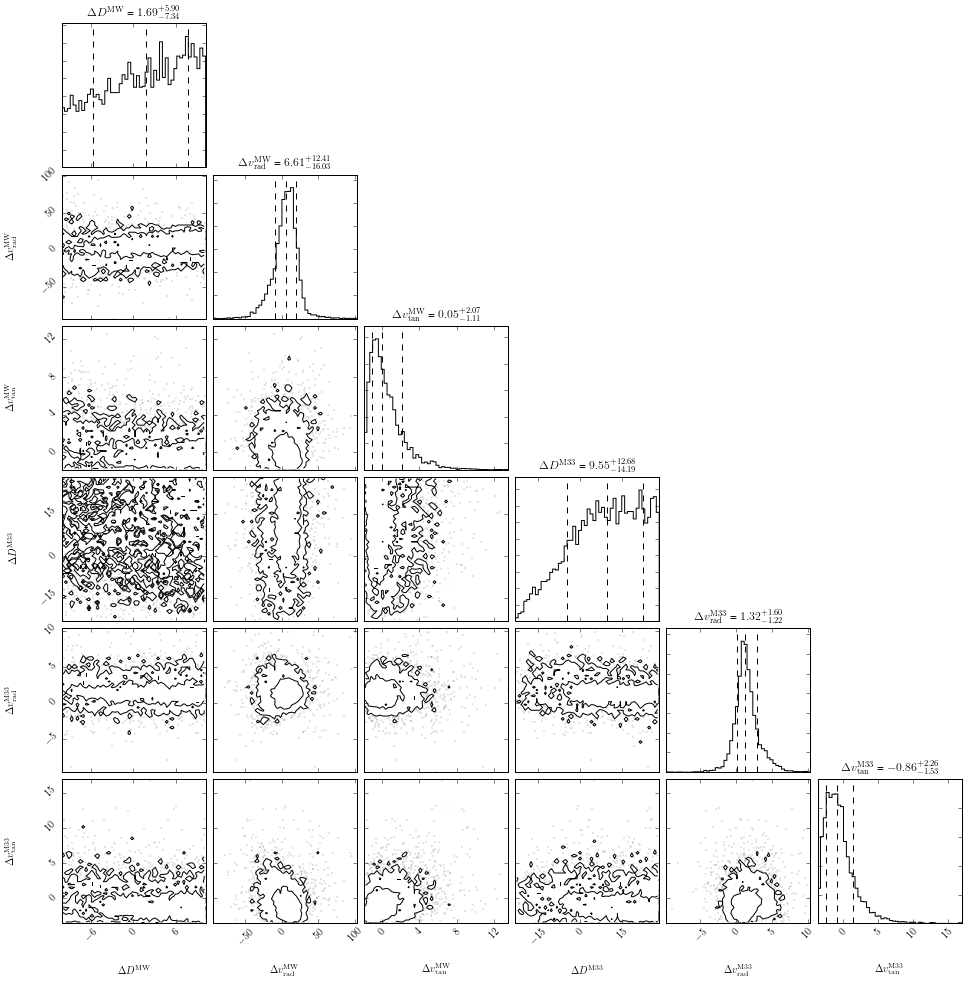

In [7]:
prior = Model.plot_kinematics()

OK, that's the prior PDF for the kinematic properties of the local group halos. Now, let's compute the likelihood of each prior sample, such that weighted histograms of them will approximate the posterior PDF for the local group halo properties.

In [8]:
logprobs, resps = L.evaluate(Model.sim_samples)

Now, how many did we get? Some models will have outlandish properties, and for numerical stability we cut these from the sample.

In [9]:
Model.compute_model_weights(L)
len(Model.weights)

4904

And how many of these carry 95% of the likelihood weight? 

In [10]:
N95 = Model.calculate_N95()
N95

3

Now we can look at the posterior PDF for the halo masses - both the MW and M31 individually, and the "local group mass", which we define as being the sum of the virial masses of the Milky Way and M31.

In [11]:
LGMvir = Model.MW.Mvir + Model.M31.Mvir
logmasses = np.log10(np.transpose(np.vstack((Model.MW.Mvir, Model.M31.Mvir, LGMvir))))
labels = ["$\log_{10}M_{\\rm vir}^{\\rm MW}/M_{\odot}$", "$\log_{10}M_{\\rm vir}^{\\rm M31}/M_{\odot}$", "$\log_{10}M_{\\rm vir}^{\\rm LG}/M_{\odot}$"]

In [12]:
logmasses.shape

(4904, 3)

Quantiles:
[(0.16, 11.381789924672816), (0.5, 11.381789924672816), (0.84, 12.008472419302722)]
Quantiles:
[(0.16, 11.807758206196253), (0.5, 11.807758206196253), (0.84, 11.807758206196253)]
Quantiles:
[(0.16, 11.946060632148077), (0.5, 11.94606084613135), (0.84, 12.296191540477162)]


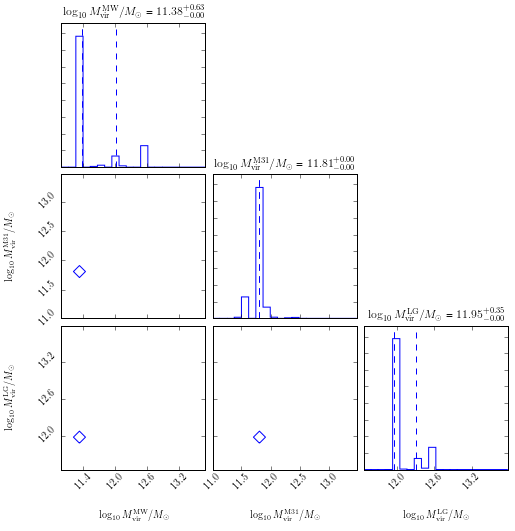

In [13]:
figure = triangle.corner(logmasses, labels=labels, quantiles=[0.16,0.5,0.84], weights=np.transpose(Model.weights),\
                         plot_contours=True, show_titles=True, title_args={"fontsize": 12}, \
                         plot_datapoints=False, bins=20, color='blue')